In [1]:
import pandas as pd
import GPy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Unidades de las tablas
<br><br>
## Archivo: 000 Analisis_Produccion-consumos CUAS.xlsx
<br><br>

### Primera tabla:
Esta tabla es de produccion de cobre
* Toneladas de cobre fino producido
<br><br>

### Segunda tabla:
Esta tabla es de produccion de cobre, pero separado por tamaño de la mina:
* Toneladas de cobre fino producido
<br><br>

### Tercera tabla:
Esta tabla es lo que consumimos de acido, considerando lo producido más lo importado (uno en cada fila):
* Toneladas de acido

## Archivo: 000 Analisis_Produccion-consumos CUAS.xlsx


In [3]:
# cargar Hoja1 del archivo: 000 Analisis _ Produccion-consumos CUAS.xlsx
# para crear los dataframes con produccion de fino y consumo de acido en
# indexados por el tiempo

folder = '/Users/juanpablodonosomerlet/Desktop/estudio-acidos/data/'
xls = pd.ExcelFile(folder + '000 Analisis _ Produccion-consumos CUAS.xlsx')
df1 = pd.read_excel(xls, 'Hoja1')
nombres_df1 = list(df1.columns.values)

In [4]:
# tabla1: produccion de fino, toda la informacion
tabla1 = df1.loc[:7,nombres_df1[2:18]]
tabla1 = tabla1.dropna()
tabla1.iloc[0].apply(int)
años = tabla1.iloc[0].apply(int)
dicc_years = {}
for i,year in enumerate(años):
    dicc_years[nombres_df1[2:18][i]] = year
tabla1 = tabla1.rename(dicc_years, axis='columns').loc[1:,:]
tabla1 = tabla1.append(tabla1.sum(), ignore_index=True)

# tabla2: consumo de acido
tabla2 = df1.loc[60:,nombres_df1[2:24]]
años2= tabla2.iloc[0].apply(int)
dicc_years2 = {}
for i,year in enumerate(años2):
    dicc_years2[nombres_df1[2:24][i]] = year
tabla2 = tabla2.rename(dicc_years2, axis='columns').loc[61:,:]

In [5]:
# dataframe de la produccion anual de fino 
produccion_fino = pd.DataFrame(tabla1.loc[6,:], index=list(tabla1.columns.values))
produccion_fino = produccion_fino.rename({6:'Produccion Cu fino anual'}, axis='columns')
produccion_fino

# dataFrame del consumo total de acido
consumo_acido = tabla2.transpose()
consumo_acido = consumo_acido.rename({61:'Produccion',
                                      62:'Importaciones',63:'Total'}, axis='columns')
# print(produccion_fino)
# print(consumo_acido.astype(int))
# consumo_acido.astype(int)

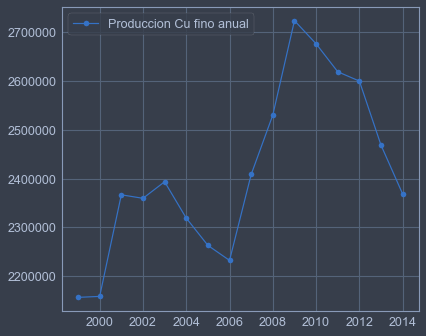

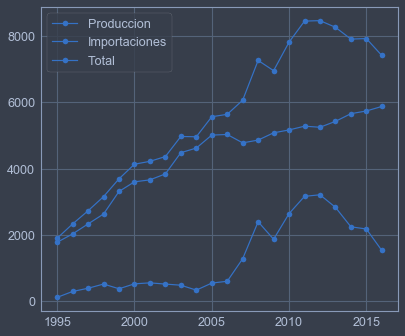

In [10]:
# fig, ax = plt.subplot()
figura, axe = plt.subplots(nrows=1, ncols=1)
produccion_fino.plot(style='bo-', ax=axe, grid=True)

figura, axe = plt.subplots(nrows=1, ncols=1)
consumo_acido.plot(style='bo-', ax=axe, grid=True)
plt.show()

In [ ]:
# multitask gaussian process
K = GPy.kern.Matern32(1)